In [1]:
%%bash
# Do not change or modify this file
# Need to install pyspark
# if pyspark is already installed, will print a message indicating pyspark already isntalled
pip install pyspark


  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=2014a126bb9e8e110f282388e128f08ec786981e46df3c684dffe198564c6041
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder\
  .master("local[*]")\
  .config("spark.memory.fraction", 0.8)\
  .config("spark.executor.memory", "12g")\
  .config("spark.driver.memory", "12g")\
  .config("spark.memory.offHeap.enabled",'true')\
  .config("spark.memory.offHeap.size","12g")\
  .getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)

In [3]:
from pyspark.sql.functions import isnan, isnull, when, count, col
import pandas as pd
from pyspark.sql.functions import col
import pyspark.sql.functions as fn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import isnan, isnull, when, count, col

In [4]:
data_df = spark.read.option("header",True).csv("data.csv")
artist_df = spark.read.option("header",True).csv("data_by_artist.csv")
genres_df = spark.read.option("header",True).csv("data_by_genres.csv")
year_df = spark.read.option("header",True).csv("data_by_year.csv")
wgenres_df = spark.read.option("header",True).csv("data_w_genres.csv")

ANALYSIS AND DATA CLEANING of DATA.CSV

In [5]:
display(data_df.toPandas().head())

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.195,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.151,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.779,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.97200000000002,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.7490000000000001,104300,0.22,0,6L63VW0PibdM1HDSBoqnoM,0.0,5,0.119,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.929,107.177,0.88,1928
3,0.995,['Francisco Canaro'],0.7809999999999999,180760,0.13,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.111,-14.734000000000002,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.72,1928
4,0.99,"['Frédéric Chopin', 'Vladimir Horowitz']",0.21,687733,0.204,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.098,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [6]:

data_df.select([count(when(isnull(c), c)).alias(c) for c in data_df.columns]).show()
data_df.select([count(when(isnan(c), c)).alias(c) for c in data_df.columns]).show()


+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+------------+-----------+-----+-------+----+
|acousticness|artists|danceability|duration_ms|energy|explicit| id|instrumentalness|key|liveness|loudness|mode|name|popularity|release_date|speechiness|tempo|valence|year|
+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+------------+-----------+-----+-------+----+
|           0|      0|           0|          0|     0|       0|  0|               0|  0|       0|       0|   0|   0|         0|           0|          0|    0|      0|   0|
+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+------------+-----------+-----+-------+----+

+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+------------

In [7]:
data_df = data_df.dropDuplicates()
types = [fn.dataType for fn in data_df.schema.fields]
types

#converting the duration in mins
data_df=data_df.withColumn("duration_min", (col("duration_ms") /60000))
data_df=data_df.withColumn("duration_min", fn.round(data_df["duration_min"], 2))
data_df = data_df.drop("id","release_date","duration_ms")


In [8]:
print((data_df.count(), len(data_df.columns)))

(169909, 17)


In [9]:
#changing the datatype
data_df = data_df.withColumn("acousticness",data_df["acousticness"].cast("float"))
data_df = data_df.withColumn("danceability",data_df["danceability"].cast("float"))
data_df = data_df.withColumn("energy",data_df["energy"].cast("float"))
data_df = data_df.withColumn("explicit",data_df["explicit"].cast("float"))
data_df = data_df.withColumn("instrumentalness",data_df["instrumentalness"].cast("float"))
data_df = data_df.withColumn("key",data_df["key"].cast("float"))
data_df = data_df.withColumn("liveness",data_df["liveness"].cast("float"))
data_df = data_df.withColumn("loudness",data_df["loudness"].cast("float"))
data_df = data_df.withColumn("mode",data_df["mode"].cast("float"))
data_df = data_df.withColumn("popularity",data_df["popularity"].cast("float"))
data_df = data_df.withColumn("speechiness",data_df["speechiness"].cast("float"))
data_df = data_df.withColumn("tempo",data_df["tempo"].cast("float"))
data_df = data_df.withColumn("valence",data_df["valence"].cast("float"))
data_df = data_df.withColumn("year",data_df["year"].cast("float"))
data_df = data_df.withColumn("duration_min",data_df["duration_min"].cast("float"))

TIME ANALYSIS

DATA ANALYSIS AND DATA CLEANING OF DATA_BY_ARTIST.CSV


In [10]:
display(artist_df.toPandas().head())

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""""""Cats"""" 1981 Original London Cast""",0.5750833333333334,0.44275,247260.0,0.3863358333333334,0.022717396666666667,0.2877083333333333,-14.205416666666665,0.18067500000000009,115.9835,0.3344333333333333,38.0,5,1,12
1,"""""""Cats"""" 1983 Broadway Cast""",0.8625384615384614,0.4417307692307693,287280.0,0.4068076923076924,0.08115826423076923,0.31521538461538456,-10.69,0.17621153846153847,103.04415384615385,0.2688653846153846,33.07692307692308,5,1,26
2,"""""""Fiddler On The Roof” Motion Picture Chorus""",0.8565714285714285,0.34828571428571425,328920.0,0.2865714285714285,0.024592948571428568,0.3257857142857143,-15.230714285714285,0.1185142857142857,77.37585714285714,0.3548571428571429,34.285714285714285,0,1,7
3,"""""""Fiddler On The Roof” Motion Picture Orchestra""",0.884925925925926,0.4250740740740739,262890.96296296304,0.2457703703703704,0.07358727925925927,0.2754814814814815,-15.639370370370367,0.12320000000000005,88.66762962962964,0.3720296296296296,34.44444444444444,0,1,27
4,"""""""Joseph And The Amazing Technicolor Dreamcoa...",0.6054444444444445,0.4373333333333334,232428.1111111111,0.4293333333333333,0.03753356,0.21611111111111114,-11.447222222222221,0.08600000000000002,120.32966666666664,0.4586666666666666,42.55555555555557,11,1,9


In [11]:
artist_df.select([count(when(isnull(c), c)).alias(c) for c in artist_df.columns]).show()
artist_df.select([count(when(isnan(c), c)).alias(c) for c in artist_df.columns]).show()

+-------+------------+------------+-----------+------+----------------+--------+--------+-----------+-----+-------+----------+---+----+-----+
|artists|acousticness|danceability|duration_ms|energy|instrumentalness|liveness|loudness|speechiness|tempo|valence|popularity|key|mode|count|
+-------+------------+------------+-----------+------+----------------+--------+--------+-----------+-----+-------+----------+---+----+-----+
|      0|           0|           0|          0|     0|               0|       0|       0|          0|    0|      0|         0|  0|   0|    0|
+-------+------------+------------+-----------+------+----------------+--------+--------+-----------+-----+-------+----------+---+----+-----+

+-------+------------+------------+-----------+------+----------------+--------+--------+-----------+-----+-------+----------+---+----+-----+
|artists|acousticness|danceability|duration_ms|energy|instrumentalness|liveness|loudness|speechiness|tempo|valence|popularity|key|mode|count|
+----

In [12]:
artist_df.describe().show()

+-------+--------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+--------------------+-------------------+------------------+-------------------+------------------+-----------------+-------------------+------------------+
|summary|             artists|      acousticness|      danceability|       duration_ms|             energy|   instrumentalness|           liveness|            loudness|        speechiness|             tempo|            valence|        popularity|              key|               mode|             count|
+-------+--------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+--------------------+-------------------+------------------+-------------------+------------------+-----------------+-------------------+------------------+
|  count|               27621|             27621|             27621|             27621| 

In [13]:
artist_df=artist_df.withColumn("duration_min", (col("duration_ms") /60000))
artist_df=artist_df.withColumn("duration_min", fn.round(artist_df["duration_min"], 2))
artist_df = artist_df.drop("duration_ms")



In [14]:
artist_df = artist_df.dropDuplicates()
types = [fn.dataType for fn in artist_df.schema.fields]
types

[StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 DoubleType]

In [17]:
artist_df = artist_df.withColumn("acousticness",artist_df["acousticness"].cast("float"))
artist_df = artist_df.withColumn("danceability",artist_df["danceability"].cast("float"))
artist_df = artist_df.withColumn("energy",artist_df["energy"].cast("float"))
artist_df = artist_df.withColumn("instrumentalness",artist_df["instrumentalness"].cast("float"))
artist_df = artist_df.withColumn("key",artist_df["key"].cast("float"))
artist_df = artist_df.withColumn("liveness",artist_df["liveness"].cast("float"))
artist_df = artist_df.withColumn("loudness",artist_df["loudness"].cast("float"))
artist_df = artist_df.withColumn("mode",artist_df["mode"].cast("float"))
artist_df = artist_df.withColumn("popularity",artist_df["popularity"].cast("float"))
artist_df = artist_df.withColumn("speechiness",artist_df["speechiness"].cast("float"))
artist_df = artist_df.withColumn("tempo",artist_df["tempo"].cast("float"))
artist_df = artist_df.withColumn("valence",artist_df["valence"].cast("float"))
artist_df = artist_df.withColumn("count",artist_df["count"].cast("float"))
artist_df = artist_df.withColumn("duration_min",artist_df["duration_min"].cast("float"))

ANALYSIS AND DATA CLEANING ON GENRE.CSV

In [16]:
display(genres_df.toPandas().head())

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.49477999999999994,0.2993333333333333,1048887.3333333333,0.45067833333333324,0.47776166666666664,0.131,-16.854,0.07681666666666667,120.28566666666666,0.22175,52.16666666666667,5,1
1,[],0.6792447448574842,0.5214733053399061,229852.6102234212,0.4015221428872992,0.19673731353934484,0.22158621487692204,-12.679075647739117,0.11226707625920136,112.02516779563427,0.5159200459415466,21.68200469637955,7,1
2,a cappella,0.6215317193348844,0.5770169060398996,193652.20470899667,0.34569408644304817,0.0037989220040791152,0.12708681770995536,-12.770211025518897,0.09532427363658015,111.81323023766345,0.4531856348581163,43.35181880911817,11,1
3,abstract,0.359395,0.4595000000000001,343018.5,0.487,0.7914000000000001,0.11947999999999999,-14.092000000000002,0.04341999999999999,124.74319999999997,0.30499,41.5,1,1
4,abstract beats,0.35334666666666664,0.6944000000000001,233824.4,0.6134,0.349402612,0.10245333333333333,-6.699799999999999,0.14345333333333335,119.3984,0.6341866666666667,58.6,10,0


In [18]:
#removing the invalid data
genres_df = genres_df.withColumn('genres', when(col('genres') == '[]', None).otherwise(col('genres')))
genres_df = genres_df.withColumn('genres', when(col('genres') == '432hz', None).otherwise(col('genres')))

genres_df.select([count(when(isnull(c), c)).alias(c) for c in genres_df.columns]).show()
genres_df.select([count(when(isnan(c), c)).alias(c) for c in genres_df.columns]).show()

genres_df = genres_df.dropna(subset=['genres'])

+------+------------+------------+-----------+------+----------------+--------+--------+-----------+-----+-------+----------+---+----+
|genres|acousticness|danceability|duration_ms|energy|instrumentalness|liveness|loudness|speechiness|tempo|valence|popularity|key|mode|
+------+------------+------------+-----------+------+----------------+--------+--------+-----------+-----+-------+----------+---+----+
|     2|           0|           0|          0|     0|               0|       0|       0|          0|    0|      0|         0|  0|   0|
+------+------------+------------+-----------+------+----------------+--------+--------+-----------+-----+-------+----------+---+----+

+------+------------+------------+-----------+------+----------------+--------+--------+-----------+-----+-------+----------+---+----+
|genres|acousticness|danceability|duration_ms|energy|instrumentalness|liveness|loudness|speechiness|tempo|valence|popularity|key|mode|
+------+------------+------------+-----------+------+-

In [19]:
genres_df=genres_df.withColumn("duration_min", (col("duration_ms") /60000))
genres_df=genres_df.withColumn("duration_min", fn.round(genres_df["duration_min"], 2))
genres_df = genres_df.drop("duration_ms")


In [20]:
genres_df = genres_df.dropDuplicates()
types = [fn.dataType for fn in genres_df.schema.fields]
types

[StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 DoubleType]

In [21]:
genres_df = genres_df.withColumn("acousticness",genres_df["acousticness"].cast("float"))
genres_df = genres_df.withColumn("danceability",genres_df["danceability"].cast("float"))
genres_df = genres_df.withColumn("energy",genres_df["energy"].cast("float"))
genres_df = genres_df.withColumn("instrumentalness",genres_df["instrumentalness"].cast("float"))
genres_df = genres_df.withColumn("liveness",genres_df["liveness"].cast("float"))
genres_df = genres_df.withColumn("loudness",genres_df["loudness"].cast("float"))
genres_df = genres_df.withColumn("mode",genres_df["mode"].cast("float"))
genres_df = genres_df.withColumn("popularity",genres_df["popularity"].cast("float"))
genres_df = genres_df.withColumn("speechiness",genres_df["speechiness"].cast("float"))
genres_df = genres_df.withColumn("tempo",genres_df["tempo"].cast("float"))
genres_df = genres_df.withColumn("valence",genres_df["valence"].cast("float"))
genres_df = genres_df.withColumn("duration_min",genres_df["duration_min"].cast("float"))

ANALYSIS AND DATA CLEANING ON YEAR.CSV

In [22]:
display(year_df.toPandas().head())
year_df.select([count(when(isnull(c), c)).alias(c) for c in year_df.columns]).show()
year_df.select([count(when(isnan(c), c)).alias(c) for c in year_df.columns]).show()
year_df=year_df.withColumn("duration_min", (col("duration_ms") /60000))
year_df=year_df.withColumn("duration_min", fn.round(year_df["duration_min"], 2))
year_df = year_df.drop("duration_ms")

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1921,0.8958234375000002,0.42566093750000017,229911.9140625,0.23678359375000005,0.3223301102343749,0.2158140625,-17.0954375,0.07725781250000001,100.39775781249999,0.42549453125,0.3515625,7,1
1,1922,0.9392361111111113,0.4799999999999998,167904.54166666666,0.23702624999999988,0.44046994097222236,0.2386472222222223,-19.17995833333333,0.11541944444444446,101.37613888888889,0.5340555555555556,0.1388888888888889,10,1
2,1923,0.9763289408284026,0.5684615384615381,178356.30177514793,0.24693609467455613,0.40193248236686385,0.2366556213017751,-14.373881656804738,0.09861893491124261,112.45659763313613,0.6247875739644974,5.727810650887574,0,1
3,1924,0.9355745443037989,0.5486540084388186,188461.64978902953,0.3470329113924048,0.583954694599156,0.23787468354430366,-14.202303797468359,0.09020970464135022,120.65335864978893,0.6685738396624478,0.6033755274261603,10,1
4,1925,0.965422053231941,0.5718897338403041,184130.69961977185,0.2643726235741445,0.4088934084410646,0.2430935361216729,-14.516707224334592,0.11545741444866928,115.67171482889732,0.6164304182509504,2.7072243346007605,5,1


+----+------------+------------+-----------+------+----------------+--------+--------+-----------+-----+-------+----------+---+----+
|year|acousticness|danceability|duration_ms|energy|instrumentalness|liveness|loudness|speechiness|tempo|valence|popularity|key|mode|
+----+------------+------------+-----------+------+----------------+--------+--------+-----------+-----+-------+----------+---+----+
|   0|           0|           0|          0|     0|               0|       0|       0|          0|    0|      0|         0|  0|   0|
+----+------------+------------+-----------+------+----------------+--------+--------+-----------+-----+-------+----------+---+----+

+----+------------+------------+-----------+------+----------------+--------+--------+-----------+-----+-------+----------+---+----+
|year|acousticness|danceability|duration_ms|energy|instrumentalness|liveness|loudness|speechiness|tempo|valence|popularity|key|mode|
+----+------------+------------+-----------+------+----------------+

In [23]:
year_df = year_df.dropDuplicates()
types = [fn.dataType for fn in year_df.schema.fields]
types

[StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 DoubleType]

In [24]:
year_df = year_df.withColumn("acousticness",year_df["acousticness"].cast("float"))
year_df = year_df.withColumn("danceability",year_df["danceability"].cast("float"))
year_df = year_df.withColumn("energy",year_df["energy"].cast("float"))
year_df = year_df.withColumn("instrumentalness",year_df["instrumentalness"].cast("float"))
year_df = year_df.withColumn("liveness",year_df["liveness"].cast("float"))
year_df = year_df.withColumn("loudness",year_df["loudness"].cast("float"))
year_df = year_df.withColumn("mode",year_df["mode"].cast("float"))
year_df = year_df.withColumn("popularity",year_df["popularity"].cast("float"))
year_df = year_df.withColumn("speechiness",year_df["speechiness"].cast("float"))
year_df = year_df.withColumn("tempo",year_df["tempo"].cast("float"))
year_df = year_df.withColumn("valence",year_df["valence"].cast("float"))
year_df = year_df.withColumn("year",year_df["year"].cast("float"))
year_df = year_df.withColumn("duration_min",year_df["duration_min"].cast("float"))

ANALYSIS AND DATA CLEANING WGENRE.CSV

In [25]:
display(wgenres_df.toPandas().head())

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""""""Cats"""" 1981 Original London Cast""",0.5750833333333334,0.44275,247260.0,0.3863358333333334,0.022717396666666667,0.2877083333333333,-14.205416666666665,0.18067500000000009,115.9835,0.3344333333333333,38.0,5,1,12,['show tunes']
1,"""""""Cats"""" 1983 Broadway Cast""",0.8625384615384614,0.4417307692307693,287280.0,0.4068076923076924,0.08115826423076923,0.31521538461538456,-10.69,0.17621153846153847,103.04415384615385,0.2688653846153846,33.07692307692308,5,1,26,[]
2,"""""""Fiddler On The Roof” Motion Picture Chorus""",0.8565714285714285,0.34828571428571425,328920.0,0.2865714285714285,0.024592948571428568,0.3257857142857143,-15.230714285714285,0.1185142857142857,77.37585714285714,0.3548571428571429,34.285714285714285,0,1,7,[]
3,"""""""Fiddler On The Roof” Motion Picture Orchestra""",0.884925925925926,0.4250740740740739,262890.96296296304,0.2457703703703704,0.07358727925925927,0.2754814814814815,-15.639370370370367,0.12320000000000005,88.66762962962964,0.3720296296296296,34.44444444444444,0,1,27,[]
4,"""""""Joseph And The Amazing Technicolor Dreamcoa...",0.6054444444444445,0.4373333333333334,232428.1111111111,0.4293333333333333,0.03753356,0.21611111111111114,-11.447222222222221,0.08600000000000002,120.32966666666664,0.4586666666666666,42.55555555555557,11,1,9,[]


In [26]:
wgenres_df.select([count(when(isnull(c), c)).alias(c) for c in wgenres_df.columns]).show()
wgenres_df.select([count(when(isnan(c), c)).alias(c) for c in wgenres_df.columns]).show()

+-------+------------+------------+-----------+------+----------------+--------+--------+-----------+-----+-------+----------+---+----+-----+------+
|artists|acousticness|danceability|duration_ms|energy|instrumentalness|liveness|loudness|speechiness|tempo|valence|popularity|key|mode|count|genres|
+-------+------------+------------+-----------+------+----------------+--------+--------+-----------+-----+-------+----------+---+----+-----+------+
|      0|           0|           0|          0|     0|               0|       0|       0|          0|    0|      0|         0|  0|   0|    0|     0|
+-------+------------+------------+-----------+------+----------------+--------+--------+-----------+-----+-------+----------+---+----+-----+------+

+-------+------------+------------+-----------+------+----------------+--------+--------+-----------+-----+-------+----------+---+----+-----+------+
|artists|acousticness|danceability|duration_ms|energy|instrumentalness|liveness|loudness|speechiness|temp

In [27]:
#wgenres_df=wgenres_df.withColumn("duration_min", (col("duration_ms") /60000))
#wgenres_df=wgenres_df.withColumn("duration_min", fn.round(wgenres_df["duration_min"], 2))
wgenres_df = wgenres_df.drop("duration_ms")

In [28]:
#more than 30% of data has genre as [], imputing them with mode value will deviate the data so we have removed those values
wgenres_df = wgenres_df.withColumn('genres', when(col('genres') == '[]', None).otherwise(col('genres')))
wgenres_df = wgenres_df.dropna(subset=['genres'])

In [29]:
wgenres_df = wgenres_df.dropDuplicates()
types = [fn.dataType for fn in wgenres_df.schema.fields]
types

[StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType,
 StringType]

In [30]:
wgenres_df = wgenres_df.withColumn("acousticness",wgenres_df["acousticness"].cast("float"))
wgenres_df = wgenres_df.withColumn("danceability",wgenres_df["danceability"].cast("float"))
wgenres_df = wgenres_df.withColumn("energy",wgenres_df["energy"].cast("float"))
wgenres_df = wgenres_df.withColumn("instrumentalness",wgenres_df["instrumentalness"].cast("float"))
wgenres_df = wgenres_df.withColumn("liveness",wgenres_df["liveness"].cast("float"))
wgenres_df = wgenres_df.withColumn("loudness",wgenres_df["loudness"].cast("float"))
wgenres_df = wgenres_df.withColumn("mode",wgenres_df["mode"].cast("float"))
wgenres_df = wgenres_df.withColumn("popularity",wgenres_df["popularity"].cast("float"))
wgenres_df = wgenres_df.withColumn("speechiness",wgenres_df["speechiness"].cast("float"))
wgenres_df = wgenres_df.withColumn("tempo",wgenres_df["tempo"].cast("float"))
wgenres_df = wgenres_df.withColumn("valence",wgenres_df["valence"].cast("float"))
wgenres_df = wgenres_df.withColumn("count",wgenres_df["count"].cast("float"))
#wgenres_df = wgenres_df.withColumn("duration_min",wgenres_df["duration_min"].cast("float"))

DATA VISUALIZATION:

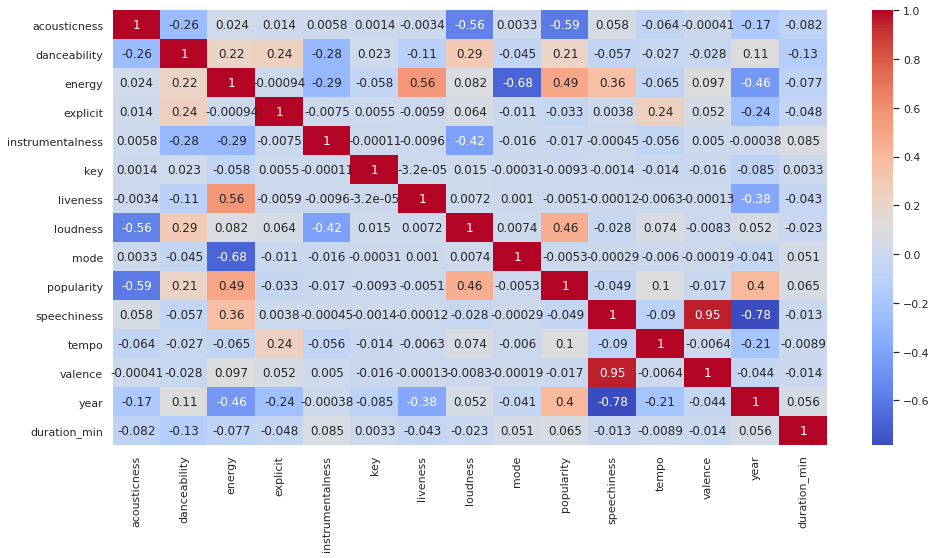

In [31]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = data_df.toPandas().corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

<Figure size 1152x576 with 0 Axes>

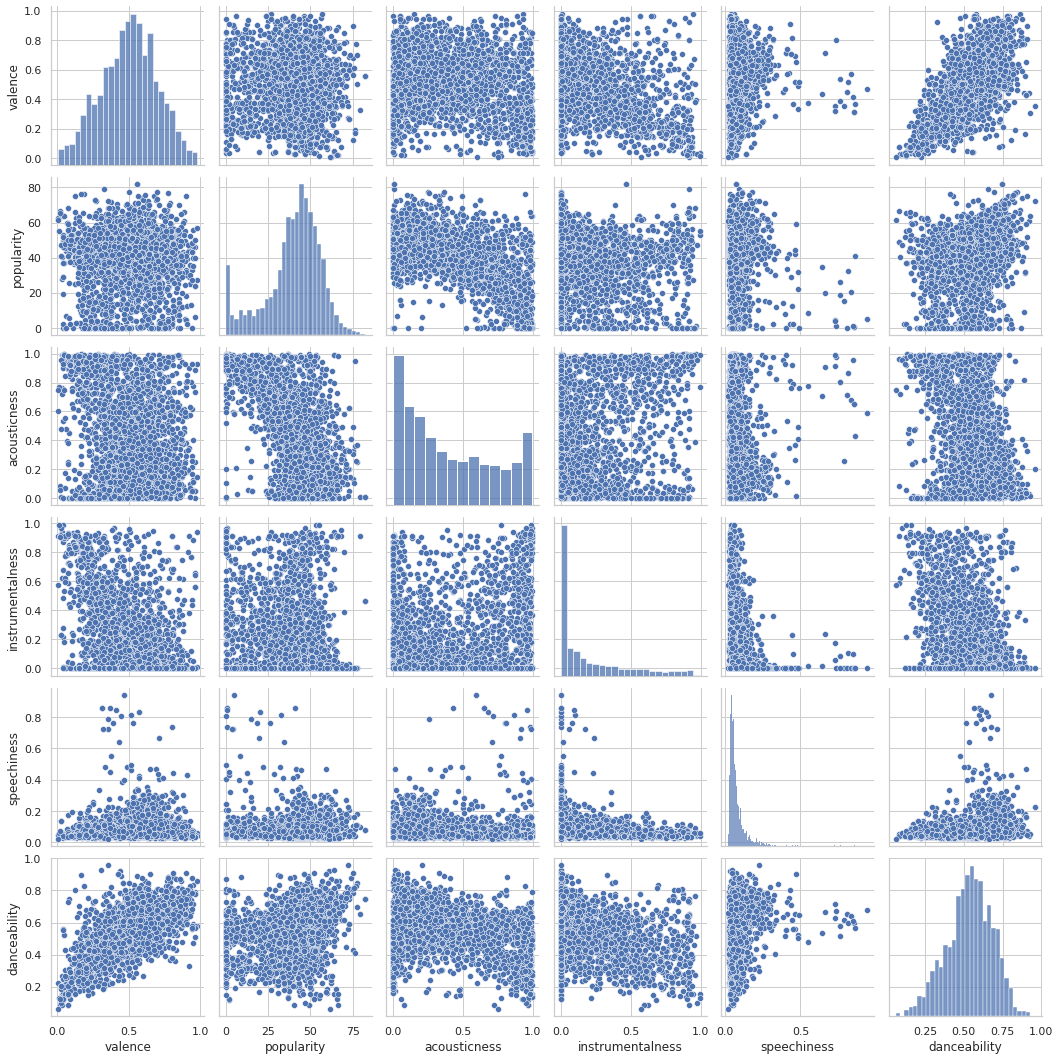

In [32]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
cols = ["valence","popularity","acousticness","instrumentalness","speechiness","danceability" ]
sns.pairplot(genres_df.toPandas()[cols], height = 2.5)
plt.show();



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

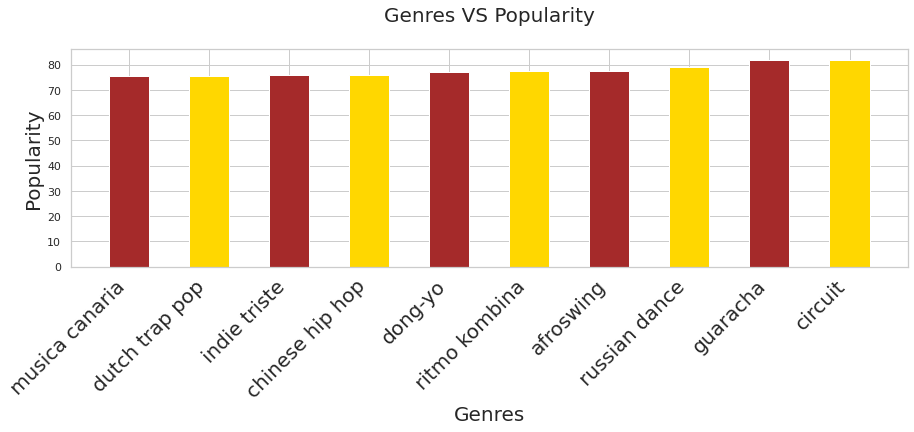

In [33]:

x=genres_df.toPandas().sort_values('popularity').tail(10)
fig = plt.figure(figsize=(15,4))
plt.bar( x['genres'],
         x['popularity'],
         width=0.5,
         color = ['brown','gold'])
plt.title('Genres VS Popularity',y=1.1,fontsize=20)
plt.xlabel('Genres',fontsize=20)
plt.ylabel('Popularity',fontsize=20)
plt.xticks(fontsize=20,rotation=45,ha='right')
#x.axes.get_xaxis().set_visible(True)

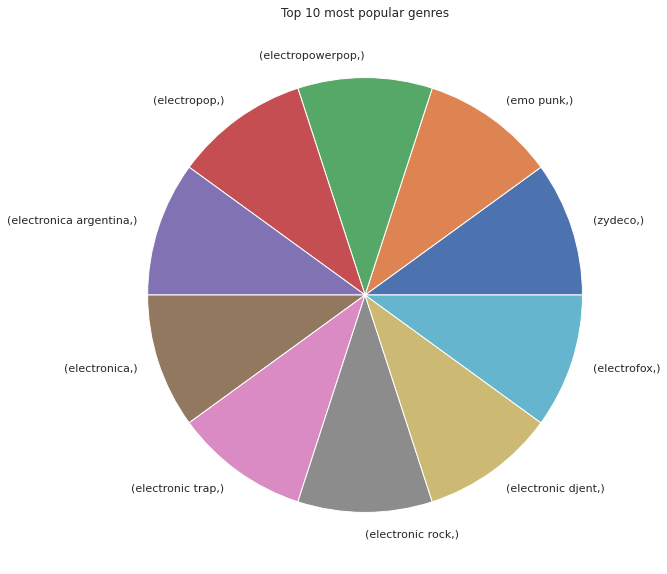

In [34]:
data = genres_df.select("genres")
data = data.toPandas()
fig = plt.figure(figsize = (10, 10))
ax = fig.subplots()
data.value_counts()[:10].plot(ax=ax, kind = "pie")
ax.set_ylabel("")
ax.set_title("Top 10 most popular genres")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]), <a list of 10 Text major ticklabel objects>)

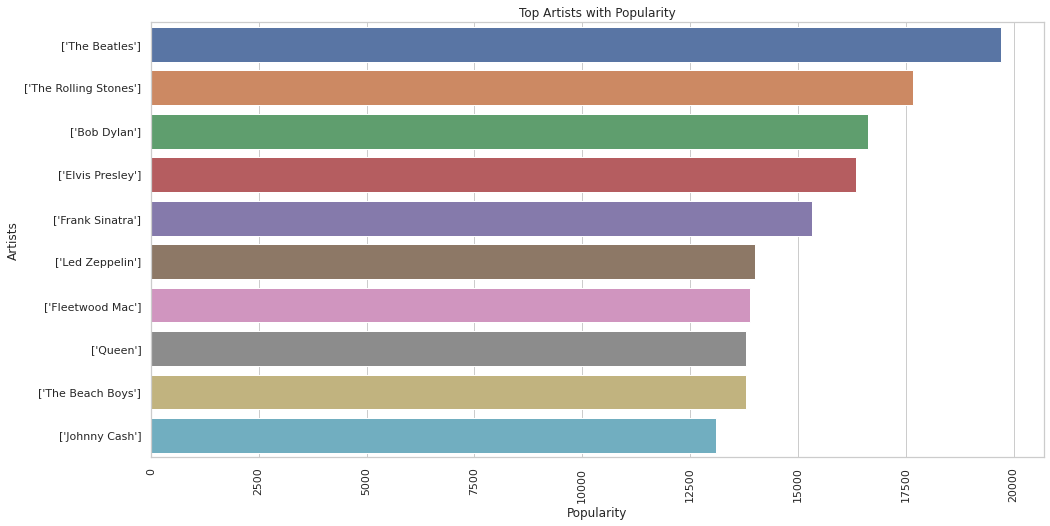

In [35]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = data_df.toPandas().groupby("artists")["popularity"].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x,x.index)
ax.set_title('Top Artists with Popularity')
ax.set_ylabel('Artists')
ax.set_xlabel('Popularity')
plt.xticks(rotation = 90)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


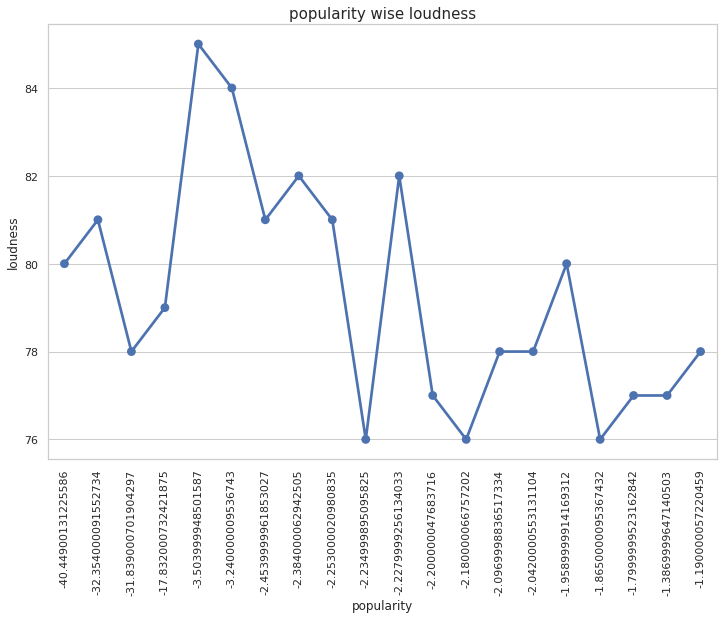

In [36]:
data = data_df.toPandas()
x = data.groupby("loudness")["popularity"].mean().sort_values(ascending=False).head(20).reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x["loudness"].values, x['popularity'].values)
plt.ylabel('loudness', fontsize=12)
plt.xlabel('popularity', fontsize=12)
plt.title("popularity wise loudness", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

TIME ANALYSIS

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Year')

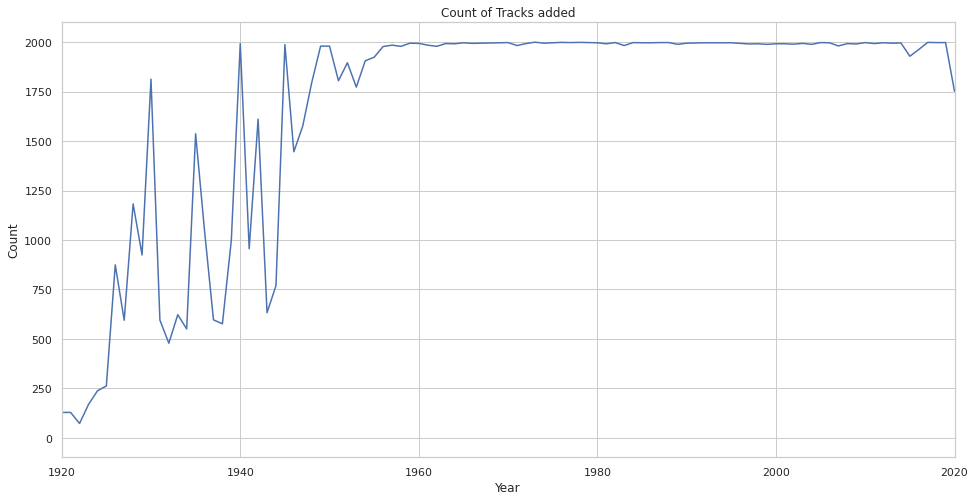

In [37]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = data_df.toPandas().groupby("year")["name"].count()
ax= sns.lineplot(x.index,x)
ax.set_title('Count of Tracks added')
plt.xlim(1920,2020)
ax.set_ylabel('Count')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

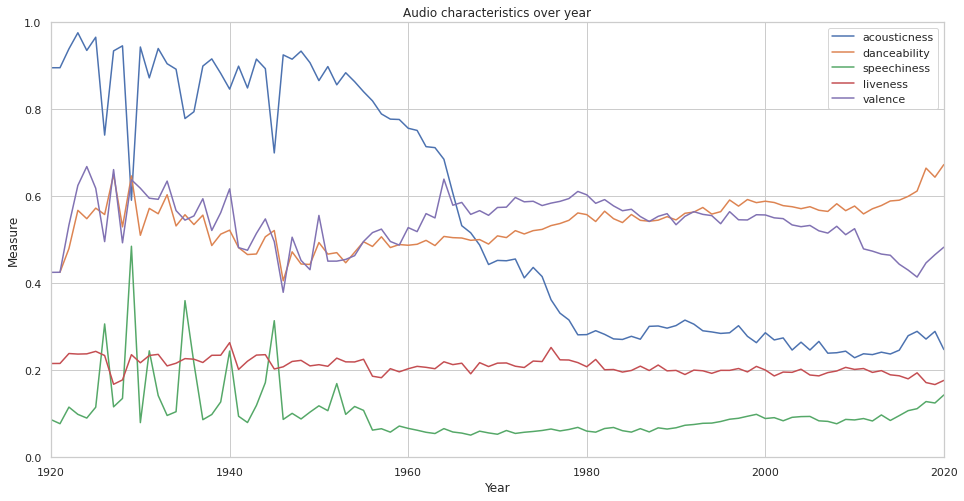

In [38]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","speechiness","liveness","valence"]
for col in columns:
    x = data_df.toPandas().groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
plt.xlim(1920,2020)
plt.ylim(0,1)
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

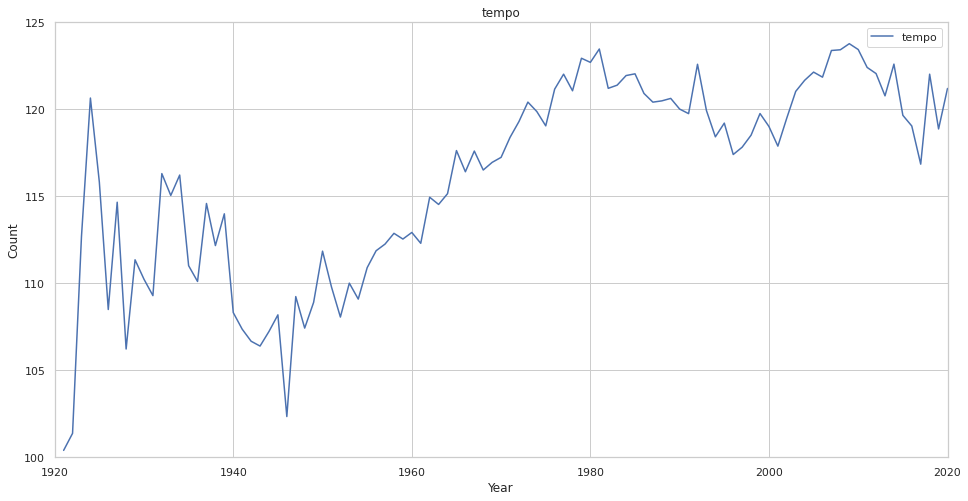

In [39]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["tempo"]
for col in columns:
    x = data_df.toPandas().groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('tempo')
plt.xlim(1920,2020)
plt.ylim(100,125)
ax.set_ylabel('Count')
ax.set_xlabel('Year')

In [40]:
data1_df= data_df.na.drop(how='any')
data1_df
data1_df.show()

+------------+--------------------+------------+------+--------+----------------+----+--------+--------+----+--------------------+----------+-----------+-------+-------+------+------------+
|acousticness|             artists|danceability|energy|explicit|instrumentalness| key|liveness|loudness|mode|                name|popularity|speechiness|  tempo|valence|  year|duration_min|
+------------+--------------------+------------+------+--------+----------------+----+--------+--------+----+--------------------+----------+-----------+-------+-------+------+------------+
|       0.907|['Ludwig van Beet...|       0.319| 0.184|     0.0|           0.437| 3.0|   0.337| -13.941| 1.0|"Symphony No. 3 i...|       0.0|     0.0433|138.008|  0.189|1936.0|       11.24|
|       0.992|['Anonymous', 'Th...|       0.324| 0.133|     0.0|         1.68E-6| 8.0|   0.405| -20.507| 0.0|     O Jesulein zart|       0.0|     0.0539|105.705| 0.0921|1940.0|        2.68|
|       0.668|['Igor Stravinsky...|       0.434| 0

In [41]:
types = [fn.dataType for fn in data1_df.schema.fields]
types

[FloatType,
 StringType,
 FloatType,
 FloatType,
 FloatType,
 FloatType,
 FloatType,
 FloatType,
 FloatType,
 FloatType,
 StringType,
 FloatType,
 FloatType,
 FloatType,
 FloatType,
 FloatType,
 FloatType]

In [42]:
columns_drop= ['artists','name']
data2_df= data1_df.drop(*columns_drop)
data2_df= data2_df.withColumnRenamed('popularity','label')
data2_df.show()

+------------+------------+------+--------+----------------+----+--------+--------+----+-----+-----------+-------+-------+------+------------+
|acousticness|danceability|energy|explicit|instrumentalness| key|liveness|loudness|mode|label|speechiness|  tempo|valence|  year|duration_min|
+------------+------------+------+--------+----------------+----+--------+--------+----+-----+-----------+-------+-------+------+------------+
|       0.907|       0.319| 0.184|     0.0|           0.437| 3.0|   0.337| -13.941| 1.0|  0.0|     0.0433|138.008|  0.189|1936.0|       11.24|
|       0.992|       0.324| 0.133|     0.0|         1.68E-6| 8.0|   0.405| -20.507| 0.0|  0.0|     0.0539|105.705| 0.0921|1940.0|        2.68|
|       0.668|       0.434| 0.553|     0.0|           0.953| 5.0|   0.184| -17.546| 0.0|  0.0|      0.039| 84.652|  0.038|1948.0|        1.13|
|       0.992|       0.863| 0.362|     0.0|         2.33E-4|11.0|   0.399|  -8.071| 0.0|  0.0|        0.2| 90.522|  0.803|1948.0|        3.09|

**Linear Regression**

In [43]:
#vc = VectorAssembler().setInputCols(train.columns[2:]).setOutputCol('f
from pyspark.ml.regression import LinearRegression
from pyspark.ml import feature
from pyspark.ml import clustering
from pyspark.ml import Pipeline
from pyspark.sql import functions as fn
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler
import requests
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import StringIndexer
#Splitting the above transformed data into train and test (75% and 25% respectively)
train,test = data2_df.randomSplit([0.75,0.25],seed=40)

vc = feature.VectorAssembler(inputCols=['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence'], outputCol='features')
lin_reg = LinearRegression(featuresCol='features', labelCol='label')
pipe_lr = Pipeline(stages=[vc, lin_reg])
model1 = pipe_lr.fit(train)
#transforming the data 
model1.transform(test)
trainingSummary = model1.stages[-1].summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)




RMSE: 15.864028
r2: 0.457374


In [44]:
from pyspark.sql.functions import col
len(train.columns)



15

In [45]:
test.count()
len(test.columns)

15

**Random Forest Regression**

In [46]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Automatically identify categorical features, and index them.
# Set maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4)
# Split the data into training and test sets (30% held out for testing)

# Train a RandomForest model.
rf = RandomForestRegressor(featuresCol="indexedFeatures")

# Chain indexers and forest in a Pipeline
pipeline = Pipeline(stages=[vc,featureIndexer, rf])

model = pipeline.fit(train)
# Make predictions.
predictions = model.transform(test)

# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

rfModel = model.stages[1]
print(rfModel)  # summary only



+-----------------+-----+--------------------+
|       prediction|label|            features|
+-----------------+-----+--------------------+
|39.83756499135938| 29.0|[1.54999997903360...|
|36.39106937895774| 41.0|[3.45000007655471...|
| 45.3935471951629| 44.0|[5.23000016983132...|
|35.73435089654493| 27.0|[1.97999994270503...|
|45.29027426184993| 75.0|[2.01999995624646...|
+-----------------+-----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 14.8764
VectorIndexerModel: uid=VectorIndexer_a4958ec4a93f, numFeatures=10, handleInvalid=error


**Mean Squared Error of Linear Regression Train/Test Outputs**

In [47]:


train_output = model1.transform(train)
test_output = model1.transform(test)
#Making use of RegressionEvaluator for predicting the mean square error with the dependent variable as price 
linear_evaluator = RegressionEvaluator(predictionCol="prediction",metricName="mse",labelCol='label')

print('Mean Squared Error for Train data= ',linear_evaluator.evaluate(train_output))
print('Mean Squared Error for Test data= ',linear_evaluator.evaluate(test_output))

Mean Squared Error for Train data=  251.66739235223832
Mean Squared Error for Test data=  251.5384799678215


**Cross-Validation**

In [48]:
from pyspark.ml.tuning import  CrossValidator,ParamGridBuilder

parmbuild = (ParamGridBuilder().build())
crossvalidation = CrossValidator(estimator=pipe_lr,                                     #Applying Cross Validator for evaluating machine learning model
                    estimatorParamMaps=parmbuild,
                    evaluator=linear_evaluator, numFolds=3,seed=20)                     #3 folds as per the question
cv_model = crossvalidation.fit(train)                                                        #Applyinh cross validation on train data 
avg_train= cv_model.avgMetrics                                                                     #Calculating the average metrics

print("The Average metrics is ",avg_train)


The Average metrics is  [251.7275901738339]


**Features of songs affecting popularity using Linear Regression**

In [49]:
scalar = StandardScaler(inputCol = 'features', outputCol='scaled_features')  
inference_pipe = Pipeline(stages=[vc,scalar,lin_reg])   
b = inference_pipe.fit(train)
value=b.stages[-1].coefficients                
coefficient=b.stages[0].getInputCols()       
coeff_df=pd.DataFrame(coefficient,columns=['features'])   
coeff_df.insert(1,"value",value,True) 
display(coeff_df)

,features,value
0,acousticness,-22.920014
1,danceability,26.913430
2,energy,11.253222
3,instrumentalness,-7.218363
4,key,0.006094
5,liveness,-7.558135
6,loudness,0.327810
7,speechiness,-25.892368
8,tempo,0.024674
9,valence,-23.296820


**Features of songs affecting popularity using Random Forest Regression**

In [51]:
scalar = StandardScaler(inputCol = 'indexedFeatures', outputCol='scaled_features')  
raf = RandomForestRegressor(featuresCol="scaled_features")

in_pipe = Pipeline(stages=[vc,featureIndexer,scalar,raf])   
c = in_pipe.fit(train)
#value=c.stages[-1].coefficients                
coefficient=c.stages[0].getInputCols()       
coefficients_df=pd.DataFrame(coefficient,columns=['features'])   
coefficients_df.insert(1,"value",value,True) 
display(coefficients_df)

,features,value
0,acousticness,-22.920014
1,danceability,26.913430
2,energy,11.253222
3,instrumentalness,-7.218363
4,key,0.006094
5,liveness,-7.558135
6,loudness,0.327810
7,speechiness,-25.892368
8,tempo,0.024674
9,valence,-23.296820


**PCA**

In [66]:

vector_assemb = feature.VectorAssembler(inputCols=['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence'], outputCol='features')


std_scaler= feature.StandardScaler(withMean=True,withStd=False,inputCol='features', outputCol='scaled_features')

#norm = feature.Normalizer(inputCol="scaled_features", outputCol="norm_features", p=2.0)

#kmeans = clustering.KMeans(k=5, featuresCol='norm_features', predictionCol='kmeans_feat')

#PCA 
pca= feature.PCA(k=10,inputCol='scaled_features', outputCol='scores')

#Pipelining
pipe_pca_1 = Pipeline(stages=[vector_assemb,std_scaler,pca])
fit_model= pipe_pca_1.fit(data1_df)
chars_pca_df= fit_model.transform(data1_df)

In [ ]:
chars_pca_df.show()

+------------+--------------------+------------+------+--------+----------------+----+--------+--------+----+--------------------+----------+-----------+-------+-------+------+------------+--------------------+--------------------+--------------------+
|acousticness|             artists|danceability|energy|explicit|instrumentalness| key|liveness|loudness|mode|                name|popularity|speechiness|  tempo|valence|  year|duration_min|            features|     scaled_features|              scores|
+------------+--------------------+------------+------+--------+----------------+----+--------+--------+----+--------------------+----------+-----------+-------+-------+------+------------+--------------------+--------------------+--------------------+
|       0.907|['Ludwig van Beet...|       0.319| 0.184|     0.0|           0.437| 3.0|   0.337| -13.941| 1.0|"Symphony No. 3 i...|       0.0|     0.0433|138.008|  0.189|1936.0|       11.24|[0.90700000524520...|[0.41685725256793...|[20.824925

**Recommending Songs**

In [67]:
import numpy as np

def get_euclidian(c1, c2):
      return float(np.sqrt((c1 - c2).T.dot((c1 - c2))))   
l2_dist_udf = fn.udf(get_euclidian)
spark.sql("SET spark.sql.crossJoin.enabled=TRUE").show()

def get_nearest_chars(char,num_nearest_char):
        chars_pca_df.where(fn.col('name')==char).select(fn.col("scores").alias('pca_scores')).join(fit_model.transform(data1_df)).\
        withColumn('dist', l2_dist_udf('scores', 'pca_scores')).\
        select("name","artists","dist").\
        orderBy(fn.asc("dist")).\
        show(10, 80) 



+--------------------+-----+
|                 key|value|
+--------------------+-----+
|spark.sql.crossJo...| TRUE|
+--------------------+-----+



In [68]:
print((get_nearest_chars('Well Done',5)))

+------------------------------------------+--------------------------------------------------------------------------------+------------------+
|                                      name|                                                                         artists|              dist|
+------------------------------------------+--------------------------------------------------------------------------------+------------------+
|                                 Well Done|                                                             ['Deitrick Haddon']|               0.0|
|                                La Difícil|                                                                      ['Camilo']|0.9939833920784605|
|          Outta Love Again - 2015 Remaster|                                                                   ['Van Halen']|1.3072621119796435|
|           It's Thunder and It's Lightning|                                                   ['We Were Promised Jetpacks']|1.808

**Recommending Artists**

In [69]:
import numpy as np


vector_assem = feature.VectorAssembler(inputCols=['acousticness', 'danceability','duration_min','energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence','popularity','mode','count'], outputCol='art_features')
std_scale= feature.StandardScaler(withMean=True,withStd=False,inputCol='art_features', outputCol='scale_features')
artist_pca= feature.PCA(k=3, inputCol='scale_features', outputCol='art_scores')
pipe_pca_2 = Pipeline(stages=[vector_assem,std_scale,artist_pca])
artist_model= pipe_pca_2.fit(artist_df)
artist_pca_df= artist_model.transform(artist_df)

def get_euclidian2(c1, c2):
      return float(np.sqrt((c1 - c2).T.dot((c1 - c2))))   
l3_dist_udf = fn.udf(get_euclidian2)
spark.sql("SET spark.sql.crossJoin.enabled=TRUE").show()

def get_nearest_artist(char,num_nearest_char):
        artist_pca_df.where(fn.col('artists')==char).select(fn.col("art_scores").alias('artist_pca_scores')).join(artist_model.transform(artist_df)).\
        withColumn('dist', l3_dist_udf('art_scores', 'artist_pca_scores')).\
        select("artists","dist").\
        orderBy(fn.asc("dist")).\
        show(10, 80) 

+--------------------+-----+
|                 key|value|
+--------------------+-----+
|spark.sql.crossJo...| TRUE|
+--------------------+-----+



In [70]:
print((get_nearest_artist('John Legend',5)))

+------------+------------------+
|     artists|              dist|
+------------+------------------+
| John Legend|               0.0|
|Thomas Rhett|10.232338562805566|
|        P!nk|10.488351362256907|
| OneRepublic|10.590973616028936|
|  Los Acosta|10.650968261896173|
|       Adele|10.688946429448775|
|     Jeremih|10.753987373453128|
|Busta Rhymes|10.828883385342305|
|  Trey Songz|10.853842698194017|
|  Jhené Aiko|10.964509136168983|
+------------+------------------+
only showing top 10 rows

None


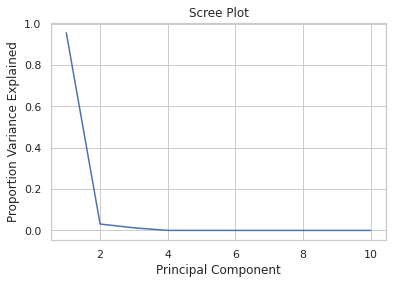

In [71]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
explained_var = fit_model.stages[-1].explainedVariance
plt.plot(np.arange(1, len(explained_var)+1), explained_var)
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Proportion Variance Explained")
cum_sum = np.cumsum(explained_var)


In [72]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

silhouette_scores = []


kmeans = KMeans(featuresCol='scores')
evaluator = ClusteringEvaluator(featuresCol='scores')
for k in range(2,7):
  fit_k = kmeans.setK(k).fit(chars_pca_df)
  predictions= fit_k.transform(chars_pca_df)
  silhouette = evaluator.evaluate(predictions)
  print("Silhouette score"+ str(silhouette),k)
  silhouette_scores.append([k,silhouette])

centers = fit_k.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette score0.6999501770422563 2
Silhouette score0.6902063524769855 3
Silhouette score0.6208152208182441 4
Silhouette score0.5836263928442413 5
Silhouette score0.5336718090179227 6
Cluster Centers: 
[-1.65147126 -0.33113483  0.01381116  0.01623861 -0.03475907 -0.04997438
  0.01106752  0.00697523  0.02881867  0.02618444]
[ 3.69461702e+01 -5.37828895e-01  2.73088927e-02  2.19194313e-02
  3.48357107e-02  1.59141105e-02 -6.40049717e-03 -1.07924787e-02
 -1.68924095e-02 -8.84554689e-03]
[-4.07942109e+01  1.52701436e+00  7.31100051e-03 -6.30709154e-02
  3.37253527e-02  5.51095885e-02 -1.38497580e-02 -5.19165927e-03
 -3.07885649e-02 -3.65781984e-02]
[ 1.61965679e+01  4.66947331e-02  1.57745220e-02  1.16350085e-02
  3.48184208e-03 -6.93833650e-03  6.74007740e-03  6.03317373e-03
  1.95595472e-02  1.76574581e-02]
[-2.07550445e+01 -1.19882270e+00 -2.82925302e-02  3.78964115e-02
 -1.48640650e-02 -1.38827891e-02  3.11429242e-03 -1.64207655e-03
  4.06870988e-07  7.12592854e-03]
[ 6.29686726e+01  

Text(0.5, 1, 'silhoutte scores vs k')

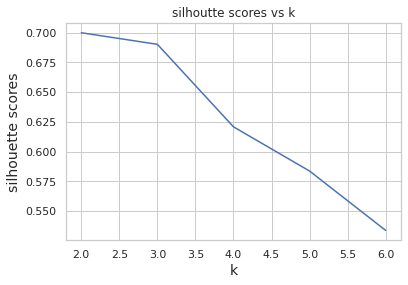

In [73]:
plt.plot(*zip(*silhouette_scores))
plt.xlabel('k',fontsize=14)
plt.ylabel('silhouette scores',fontsize=14)
plt.title('silhoutte scores vs k',y=1)

Silhouette score = 0.6208152208182441


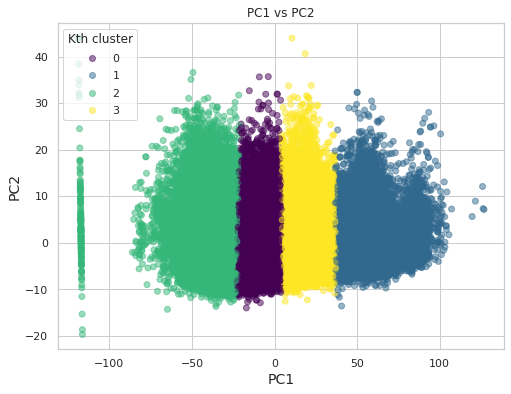

In [74]:
from pyspark.ml.functions import vector_to_array as vca

df_kmeans = kmeans.setK(4).fit(chars_pca_df).transform(chars_pca_df)
silhouette = evaluator.evaluate(df_kmeans)
print("Silhouette score = " + str(silhouette))
df_kmeans.limit(10).toPandas()
predict_df = df_kmeans.withColumn('scores',vca('scores')).select([fn.col('scores')[0],fn.col('scores')[1],'prediction']).toPandas()

fig, ax = plt.subplots(1,1, figsize =(8,6))
scatter= ax.scatter(predict_df['scores[0]'],predict_df['scores[1]'] ,c = predict_df.prediction,cmap = 'viridis',alpha=0.5)
plt.title('PC1 vs PC2',y=1)
plt.xlabel('PC1',fontsize=14)
plt.ylabel('PC2',fontsize=14)
ax.legend(*scatter.legend_elements(), loc='upper left', title='Kth cluster')